In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline


data = pd.read_csv("fitness_summary_all_replicates_parameters.csv", sep="\t")
lm_devtime = smf.ols(formula="development ~ a + a1 + a2 + a3 + a4 + a5 + b12 + b13 + b14 + b15 + b23 + b24 + b25 + "
                             "b34 + b35 + b45 + c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 + "
                             "d1234 + d1235 + d1245 + d1345 + d2345 + e12345", data=data).fit() 
lm_fitness = smf.ols(formula="fitness ~ a + a1 + a2 + a3 + a4 + a5 + b12 + b13 + b14 + b15 + b23 + b24 + b25 + b34 + "
                             "b35 + b45 + c123 + c124 + c125 + c134 + c135 + c145 + c234 + c235 + c245 + c345 + d1234 "
                             "+ d1235 + d1245 + d1345 + d2345 + e12345", data=data).fit() 
#model_params = ["a", "a1", "a2", "a3", "a4", "a5", "b12", "b13", "b14", "b15", "b23", "b24", "b25", "b34", "b35", "b45",
#                "c123", "c124", "c125", "c134", "c135", "c145", "c234", "c235", "c245", "c345", "d1234", "d1235",
#                "d1245", "d1345", "d2345", "e12345"]

In [2]:
lm_devtime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            development   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     227.3
Date:                Tue, 28 Feb 2017   Prob (F-statistic):           3.94e-96
Time:                        11:53:49   Log-Likelihood:                 193.38
No. Observations:                 158   AIC:                            -322.8
Df Residuals:                     126   BIC:                            -224.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.0000      0.020    250.998      0.000         4.961     5.039
a              5.0000      0.020    250.998      0.000         4.961     5.039
a1             1.0000      0.053     18.708      0.000         0.894     1.106
a2             1.0000      0.056     17.748      0.000         0.888     1.112
a3             0.6667      0.053     12.472      0.000         0.561     0.772
a4             0.6667      0.053     12.472      0.000         0.561     0.772
a5             0.3333      0.053      6.236      0.000         0.228     0.439
b12           -1.0000      0.076    -13.229      0.000        -1.150    -0.850
b13           -1.0000      0.073    -13.612      0.000        -1.145    -0.855
b14           -0.6667      0.073     -9.075      0.000        -0.812    -0.521
b15           -1.3333      0.073    -18.150      0.000        -1.479    -1.188
b23           -2.0000      0.076    -26.458      0.000        -2.150    -1.850
b24           -1.6667      0.076    -22.048      0.000        -1.816    -1.517
b25           -2.3333      0.076    -30.867      0.000        -2.483    -2.184
b34           -1.5333      0.073    -20.872      0.000        -1.679    -1.388
b35           -0.6667      0.073     -9.075      0.000        -0.812    -0.521
b45           -1.0000      0.073    -13.612      0.000        -1.145    -0.855
c123           1.6667      0.104     16.042      0.000         1.461     1.872
c124           1.3333      0.104     12.834      0.000         1.128     1.539
c125           2.3333      0.104     22.459      0.000         2.128     2.539
c134           1.5333      0.102     14.981      0.000         1.331     1.736
c135           1.0000      0.102      9.770      0.000         0.797     1.203
c145           0.6667      0.102      6.513      0.000         0.464     0.869
c234           2.5333      0.104     24.384      0.000         2.328     2.739
c235           2.3333      0.104     22.459      0.000         2.128     2.539
c245           3.0000      0.104     28.876      0.000         2.794     3.206
c345           1.5333      0.102     14.981      0.000         1.331     1.736
d1234         -2.5333      0.145    -17.502      0.000        -2.820    -2.247
d1235         -2.6667      0.145    -18.423      0.000        -2.953    -2.380
d1245         -3.0000      0.145    -20.725      0.000        -3.286    -2.714
d1345         -1.5333      0.144    -10.674      0.000        -1.818    -1.249
d2345         -3.2000      0.145    -22.107      0.000        -3.486    -2.914
e12345         4.5333      0.203     22.315      0.000         4.131     4.935
==============================================================================
Omnibus:                      283.717   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67311.226
Sk

In [3]:
lm_fitness.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                fitness   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2.209
Date:                Tue, 28 Feb 2017   Prob (F-statistic):            0.00114
Time:                        11:53:53   Log-Likelihood:                 401.79
No. Observations:                 158   AIC:                            -739.6
Df Residuals:                     126   BIC:                            -641.6
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6039      0.005    113.375      0.000         0.593     0.614
a              0.6039      0.005    113.375      0.000         0.593     0.614
a1            -0.0362      0.014     -2.534      0.013        -0.064    -0.008
a2            -0.0362      0.015     -2.405      0.018        -0.066    -0.006
a3            -0.0031      0.014     -0.219      0.827        -0.031     0.025
a4            -0.0015      0.014     -0.103      0.918        -0.030     0.027
a5             0.0076      0.014      0.530      0.597        -0.021     0.036
b12            0.0485      0.020      2.397      0.018         0.008     0.088
b13            0.0364      0.020      1.853      0.066        -0.002     0.075
b14            0.0227      0.020      1.158      0.249        -0.016     0.062
b15            0.0430      0.020      2.187      0.031         0.004     0.082
b23            0.0419      0.020      2.073      0.040         0.002     0.082
b24            0.0236      0.020      1.168      0.245        -0.016     0.064
b25            0.0516      0.020      2.553      0.012         0.012     0.092
b34            0.0150      0.020      0.764      0.446        -0.024     0.054
b35           -0.0018      0.020     -0.089      0.929        -0.041     0.037
b45           -0.0026      0.020     -0.133      0.895        -0.041     0.036
c123          -0.0418      0.028     -1.504      0.135        -0.097     0.013
c124          -0.0225      0.028     -0.811      0.419        -0.078     0.032
c125          -0.0764      0.028     -2.749      0.007        -0.131    -0.021
c134          -0.0330      0.027     -1.205      0.230        -0.087     0.021
c135          -0.0396      0.027     -1.446      0.151        -0.094     0.015
c145          -0.0187      0.027     -0.683      0.496        -0.073     0.035
c234          -0.0273      0.028     -0.982      0.328        -0.082     0.028
c235          -0.0374      0.028     -1.347      0.180        -0.092     0.018
c245          -0.0347      0.028     -1.250      0.213        -0.090     0.020
c345          -0.0049      0.027     -0.179      0.858        -0.059     0.049
d1234          0.0261      0.039      0.675      0.501        -0.050     0.103
d1235          0.0617      0.039      1.593      0.114        -0.015     0.138
d1245          0.0499      0.039      1.289      0.200        -0.027     0.127
d1345          0.0298      0.038      0.775      0.440        -0.046     0.106
d2345          0.0168      0.039      0.434      0.665        -0.060     0.093
e12345        -0.0509      0.054     -0.936      0.351        -0.158     0.057
==============================================================================
Omnibus:                       18.480   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.112
Sk

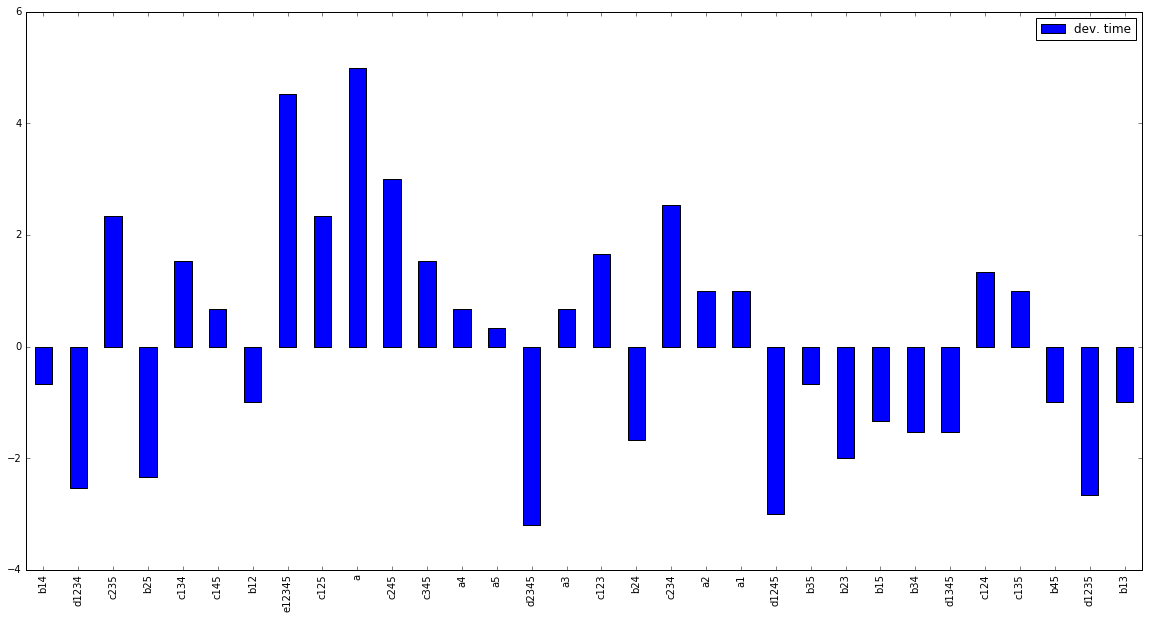

In [4]:
lm_params = {}
lm_params["a"] = lm_devtime.params.a
lm_params["a1"] = lm_devtime.params.a1
lm_params["a2"] = lm_devtime.params.a2
lm_params["a3"] = lm_devtime.params.a3
lm_params["a4"] = lm_devtime.params.a4
lm_params["a5"] = lm_devtime.params.a5
lm_params["b12"] = lm_devtime.params.b12
lm_params["b13"] = lm_devtime.params.b13
lm_params["b14"] = lm_devtime.params.b14
lm_params["b15"] = lm_devtime.params.b15
lm_params["b23"] = lm_devtime.params.b23
lm_params["b24"] = lm_devtime.params.b24
lm_params["b25"] = lm_devtime.params.b25
lm_params["b34"] = lm_devtime.params.b34
lm_params["b35"] = lm_devtime.params.b35
lm_params["b45"] = lm_devtime.params.b45
lm_params["c123"] = lm_devtime.params.c123
lm_params["c124"] = lm_devtime.params.c124
lm_params["c125"] = lm_devtime.params.c125
lm_params["c134"] = lm_devtime.params.c134
lm_params["c135"] = lm_devtime.params.c135
lm_params["c145"] = lm_devtime.params.c145
lm_params["c234"] = lm_devtime.params.c234
lm_params["c235"] = lm_devtime.params.c235
lm_params["c245"] = lm_devtime.params.c245
lm_params["c345"] = lm_devtime.params.c345
lm_params["d1234"] = lm_devtime.params.d1234
lm_params["d1235"] = lm_devtime.params.d1235
lm_params["d1245"] = lm_devtime.params.d1245
lm_params["d1345"] = lm_devtime.params.d1345
lm_params["d2345"] = lm_devtime.params.d2345
lm_params["e12345"] = lm_devtime.params.e12345

lm_params_df = pd.DataFrame.from_dict(lm_params, orient='index')
lm_params_df.columns = ["dev. time"]

lm_params_df.plot.bar(figsize=(20, 10))

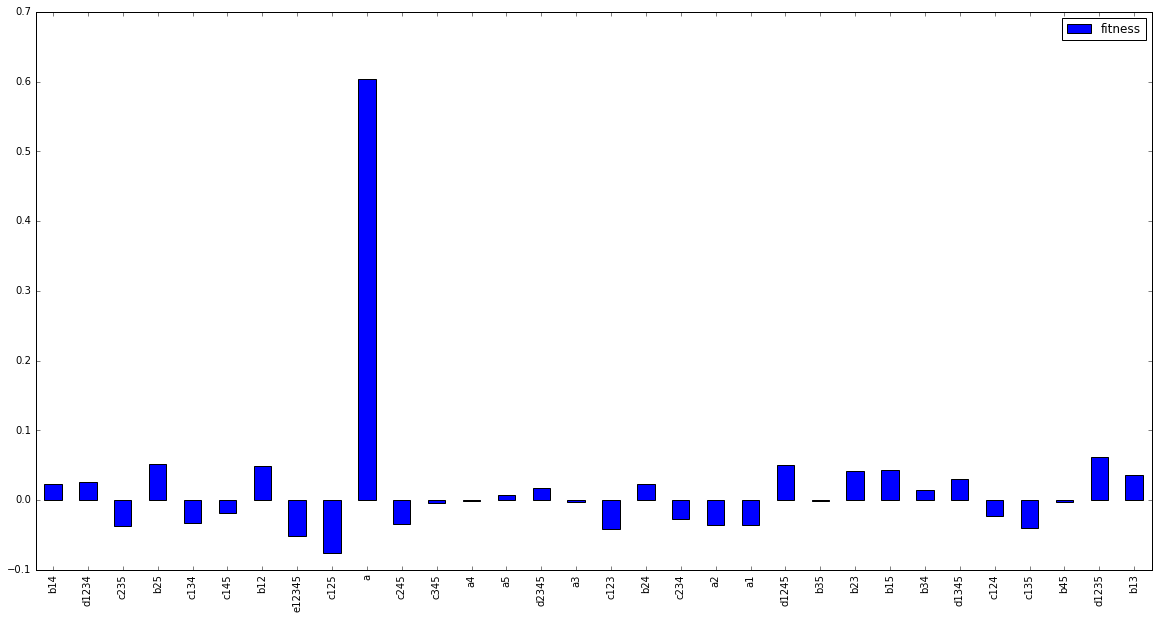

In [5]:
lm_params_fitness = {}
lm_params_fitness["a"] = lm_fitness.params.a
lm_params_fitness["a1"] = lm_fitness.params.a1
lm_params_fitness["a2"] = lm_fitness.params.a2
lm_params_fitness["a3"] = lm_fitness.params.a3
lm_params_fitness["a4"] = lm_fitness.params.a4
lm_params_fitness["a5"] = lm_fitness.params.a5
lm_params_fitness["b12"] = lm_fitness.params.b12
lm_params_fitness["b13"] = lm_fitness.params.b13
lm_params_fitness["b14"] = lm_fitness.params.b14
lm_params_fitness["b15"] = lm_fitness.params.b15
lm_params_fitness["b23"] = lm_fitness.params.b23
lm_params_fitness["b24"] = lm_fitness.params.b24
lm_params_fitness["b25"] = lm_fitness.params.b25
lm_params_fitness["b34"] = lm_fitness.params.b34
lm_params_fitness["b35"] = lm_fitness.params.b35
lm_params_fitness["b45"] = lm_fitness.params.b45
lm_params_fitness["c123"] = lm_fitness.params.c123
lm_params_fitness["c124"] = lm_fitness.params.c124
lm_params_fitness["c125"] = lm_fitness.params.c125
lm_params_fitness["c134"] = lm_fitness.params.c134
lm_params_fitness["c135"] = lm_fitness.params.c135
lm_params_fitness["c145"] = lm_fitness.params.c145
lm_params_fitness["c234"] = lm_fitness.params.c234
lm_params_fitness["c235"] = lm_fitness.params.c235
lm_params_fitness["c245"] = lm_fitness.params.c245
lm_params_fitness["c345"] = lm_fitness.params.c345
lm_params_fitness["d1234"] = lm_fitness.params.d1234
lm_params_fitness["d1235"] = lm_fitness.params.d1235
lm_params_fitness["d1245"] = lm_fitness.params.d1245
lm_params_fitness["d1345"] = lm_fitness.params.d1345
lm_params_fitness["d2345"] = lm_fitness.params.d2345
lm_params_fitness["e12345"] = lm_fitness.params.e12345

lm_params_fitness_df = pd.DataFrame.from_dict(lm_params_fitness, orient='index')
lm_params_fitness_df.columns = ["fitness"]

lm_params_fitness_df.plot.bar(figsize=(20, 10))